In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# https://stackoverflow.com/questions/57399915/how-do-i-determine-the-locations-of-the-points-after-perspective-transform-in-t
def warpPoint(p, H):
    px = (H[0][0]*p[0] + H[0][1]*p[1] + H[0][2]) / ((H[2][0]*p[0] + H[2][1]*p[1] + H[2][2]))
    py = (H[1][0]*p[0] + H[1][1]*p[1] + H[1][2]) / ((H[2][0]*p[0] + H[2][1]*p[1] + H[2][2]))
    p_after = np.array([px, py])
    return p_after

def c_gravity(p1, p2, p3):    
    return (p1 + p2 + p3) / 3


In [17]:
# Campus Video
frame_nr = 200
cap1 = cv2.VideoCapture('./data/campus/campus4-c0.avi')
cap2 = cv2.VideoCapture('./data/campus/campus4-c1.avi')
cap3 = cv2.VideoCapture('./data/campus/campus4-c2.avi')

cap1.set(cv2.CAP_PROP_POS_FRAMES, frame_nr)
cap2.set(cv2.CAP_PROP_POS_FRAMES, frame_nr)
cap3.set(cv2.CAP_PROP_POS_FRAMES, frame_nr)

ret1, frame1 = cap1.read()
ret2, frame2 = cap2.read()
ret3, frame3 = cap3.read()

frame1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)
frame2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB)
frame3 = cv2.cvtColor(frame3, cv2.COLOR_BGR2RGB)

# Ground homographies
G1 = np.array([[-0.211332, -0.405226, 70.781223], [-0.019746, -1.564936, 226.377280], [-0.000025, -0.001961, 0.160791]])
G1_inv = np.linalg.inv(G1)

G2 = np.array([[0.000745, 0.350335, -98.376103], [-0.164871, -0.390422, 54.081423], [0.000021, -0.001668, 0.111075]])
G2_inv = np.linalg.inv(G2)

G3 = np.array([[0.089976, 1.066795, -152.055667], [-0.116343, 0.861342, -75.122116], [0.000015, 0.001442, -0.064065]])
G3_inv = np.linalg.inv(G3)

# manualy selected points of person detection
p1 = np.array([190, 190, 0])
p2 = np.array([300, 170, 0])
p3 = np.array([20, 175, 0])

In [18]:
new_shape = (700, 700)

frame1_after = cv2.warpPerspective(frame1, G1, new_shape)
frame2_after = cv2.warpPerspective(frame2, G2, new_shape)
frame3_after = cv2.warpPerspective(frame3, G3, new_shape)

p1_after = warpPoint(p1, G1)
p2_after = warpPoint(p2, G2)
p3_after = warpPoint(p3, G3)

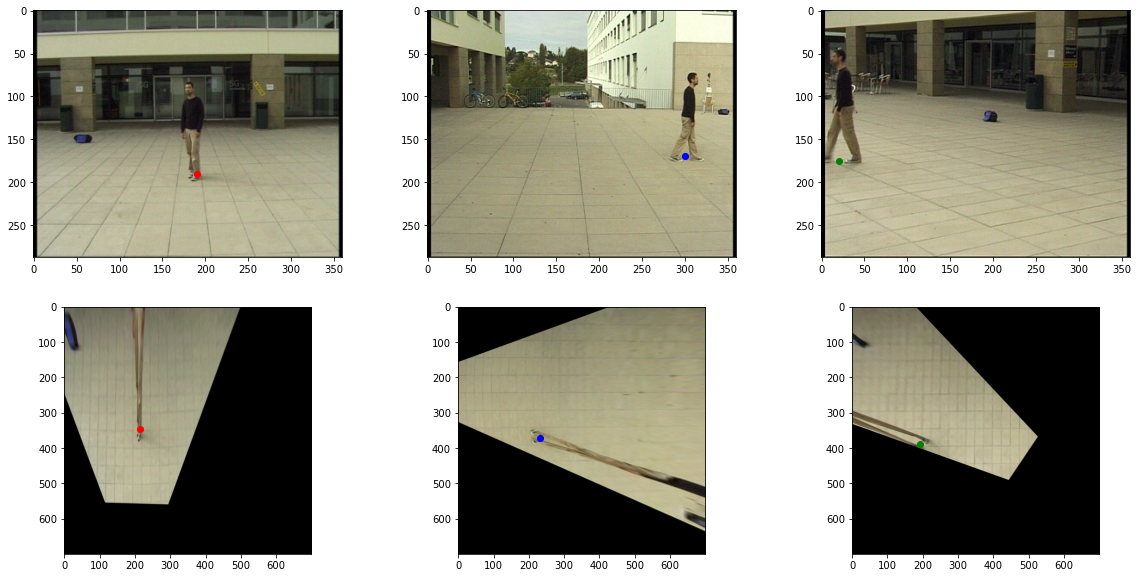

In [19]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))


ax[0][0].imshow(frame1)
ax[0][0].plot(p1[0], p1[1], 'ro')

ax[1][0].imshow(frame1_after)
ax[1][0].plot(p1_after[0], p1_after[1], 'ro')

ax[0][1].imshow(frame2)
ax[0][1].plot(p2[0], p2[1], 'bo')

ax[1][1].imshow(frame2_after)
ax[1][1].plot(p2_after[0], p2_after[1], 'bo')

ax[0][2].imshow(frame3)
ax[0][2].plot(p3[0], p3[1], 'go')

ax[1][2].imshow(frame3_after)
ax[1][2].plot(p3_after[0], p3_after[1], 'go')

plt.show()

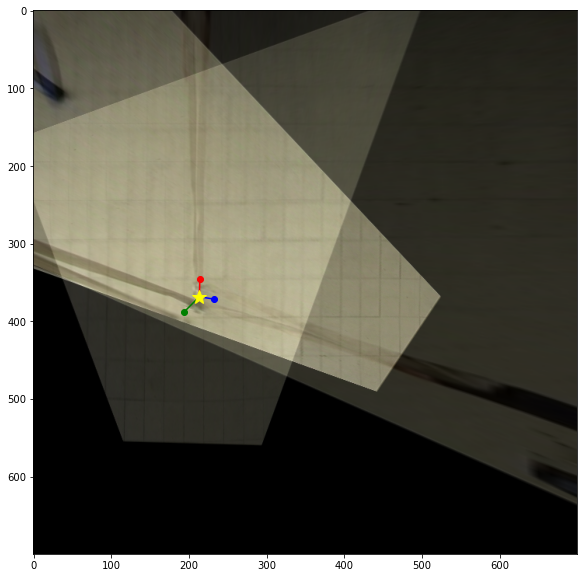

In [20]:
# overlay images
frame1_after = cv2.cvtColor(frame1_after, cv2.COLOR_RGB2BGR)
frame2_after = cv2.cvtColor(frame2_after, cv2.COLOR_RGB2BGR)
frame3_after = cv2.cvtColor(frame3_after, cv2.COLOR_RGB2BGR)

h, w = frame1_after.shape[:2]

dst = cv2.addWeighted(frame1_after, 0.5, frame2_after, 0.5, 0)
dst = cv2.addWeighted(dst, 0.5, frame3_after, 0.5, 0)
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

pg = c_gravity(p1_after, p2_after, p3_after)

plt.figure(figsize=(10, 10))
plt.imshow(dst)
plt.plot(p1_after[0], p1_after[1], 'ro')
plt.plot(p2_after[0], p2_after[1], 'bo')
plt.plot(p3_after[0], p3_after[1], 'go')


plt.plot([p1_after[0], pg[0]], [p1_after[1], pg[1]], 'r-')
plt.plot([p2_after[0], pg[0]], [p2_after[1], pg[1]], 'b-')
plt.plot([p3_after[0], pg[0]], [p3_after[1], pg[1]], 'g-')
plt.plot(pg[0], pg[1], marker='*', markersize=15, color="yellow")


plt.show()
